# LOAN APPROVAL PREDICTION

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Terdapat spasi pada bagian kolom sehingga harus dilakukan penghapusan spasi tersebut

In [3]:
# Menghapus spasi pada semua bagian judul kolom
df.columns = df.columns.str.replace(' ','')

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


data memeliki 13 kolom dengan 4269 baris

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [7]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


data terlihat sesuai dengan namun hanya terdapat kesalahan pada niali minimum residential_assets_value bernilai minus seharusnya nilai terkecil adalah 0.

lakukan pengecekan nilai minimun tersebut.

In [8]:
min_residential_assets_value = df['residential_assets_value'].min()

print("Nilai Minimum Residential Assets Value: {}".format(min_residential_assets_value))

Nilai Minimum Residential Assets Value: -100000


lakukan proses replace dengan nilai 100000

In [9]:
# Ganti nilai minimum yang negatif dengan 100000
df['residential_assets_value'] = df['residential_assets_value'].replace(df['residential_assets_value'].min(), 100000)

In [10]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.473928e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.502129e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [11]:
df['loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64

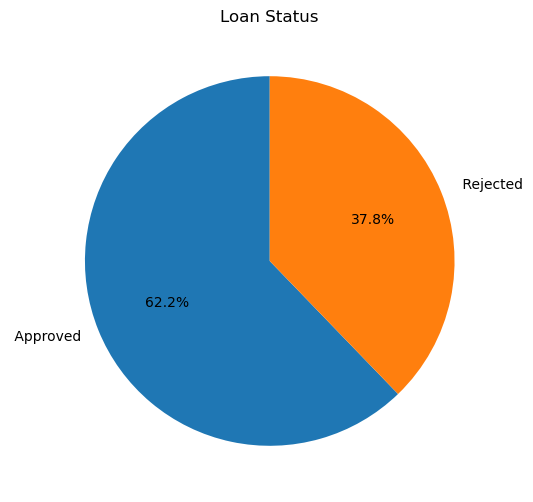

In [12]:
# Mendapatkan distribusi nilai dalam kolom 'loan_status'
loan_status_counts = df['loan_status'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Status')
plt.show()

Dari jumlah total aplikasi kredit sebanyak 4.269,
ada sebanyak 2.656 aplikasi yang di setujui (62,2%) 
ada sebanyak 1.613 aplikasiyang di tolak (37.8%)

In [13]:
# Menghitung count education terpisah untuk Approved dan Rejected
education_count_approved = df[df['loan_status'] == ' Approved']['education'].value_counts().sort_index()
education_count_rejected = df[df['loan_status'] == ' Rejected']['education'].value_counts().sort_index()

# Menampilkan hasil
print("Count of Education for Approved:")
print(education_count_approved)

print("\nCount of Education for Rejected:")
print(education_count_rejected)

Count of Education for Approved:
 Graduate        1339
 Not Graduate    1317
Name: education, dtype: int64

Count of Education for Rejected:
 Graduate        805
 Not Graduate    808
Name: education, dtype: int64


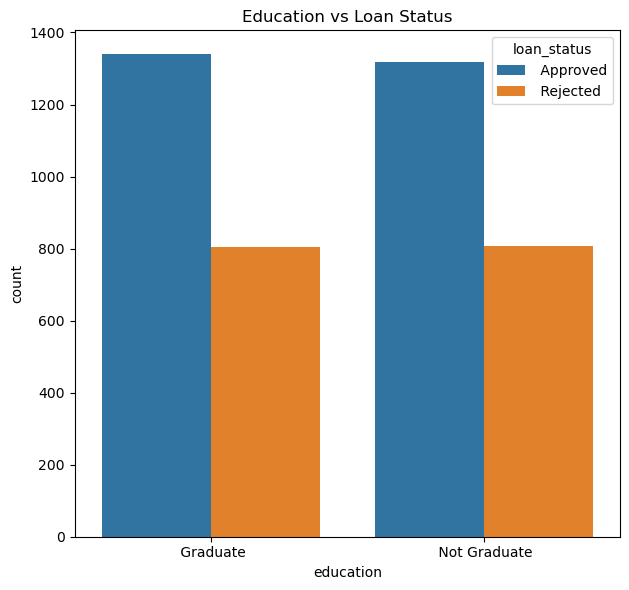

In [14]:
plt.figure(figsize=(12, 6))

# Plot untuk 'education'
plt.subplot(1, 2, 1)
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Education vs Loan Status')

plt.tight_layout()
plt.show()

Berdasarkan chart disamping, dapat disimpulkan bahwa tidak ada perbedaan yang signifikan antara tingkat pendidikan dalam persetujuan kredit.


In [15]:
# Menghitung count of self_employed terpisah untuk Approved dan Rejected
SelfEmp_count_approved = df[df['loan_status'] == ' Approved']['self_employed'].value_counts().sort_index()
SelfEmp_count_rejected = df[df['loan_status'] == ' Rejected']['self_employed'].value_counts().sort_index()

# Menampilkan hasil
print("Count of Self Emp for Approved:")
print(SelfEmp_count_approved)

print("\nCount of Self Emp for Rejected:")
print(SelfEmp_count_rejected)

Count of Self Emp for Approved:
 No     1318
 Yes    1338
Name: self_employed, dtype: int64

Count of Self Emp for Rejected:
 No     801
 Yes    812
Name: self_employed, dtype: int64


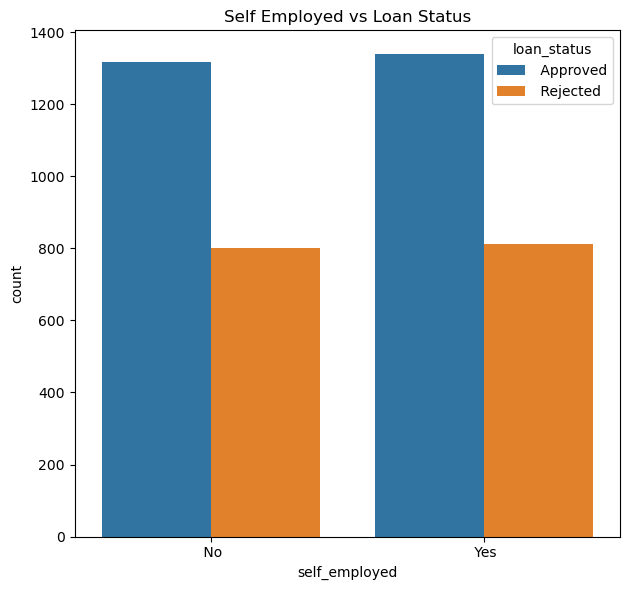

In [16]:
plt.figure(figsize=(12, 6))


# Plot untuk 'self_employed'
plt.subplot(1, 2, 2)
sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.title('Self Employed vs Loan Status')

plt.tight_layout()
plt.show()

Berdasarkan chart disamping, dapat disimpulkan bahwa tidak ada perbedaan yang signifikan antara tingkat bekerja sendiri ataupun pasangan ikut bekerja terhadap persetujuan kredit.

In [17]:
# Menghitung count of no_of_dependents terpisah untuk Approved dan Rejected
dependents_count_approved = df[df['loan_status'] == ' Approved']['no_of_dependents'].value_counts().sort_index()
dependents_count_rejected = df[df['loan_status'] == ' Rejected']['no_of_dependents'].value_counts().sort_index()

# Menampilkan hasil
print("Count of Number of Dependents for Approved:")
print(dependents_count_approved)

print("\nCount of Number of Dependents for Rejected:")
print(dependents_count_rejected)

Count of Number of Dependents for Approved:
0    457
1    430
2    441
3    457
4    465
5    406
Name: no_of_dependents, dtype: int64

Count of Number of Dependents for Rejected:
0    255
1    267
2    267
3    270
4    287
5    267
Name: no_of_dependents, dtype: int64


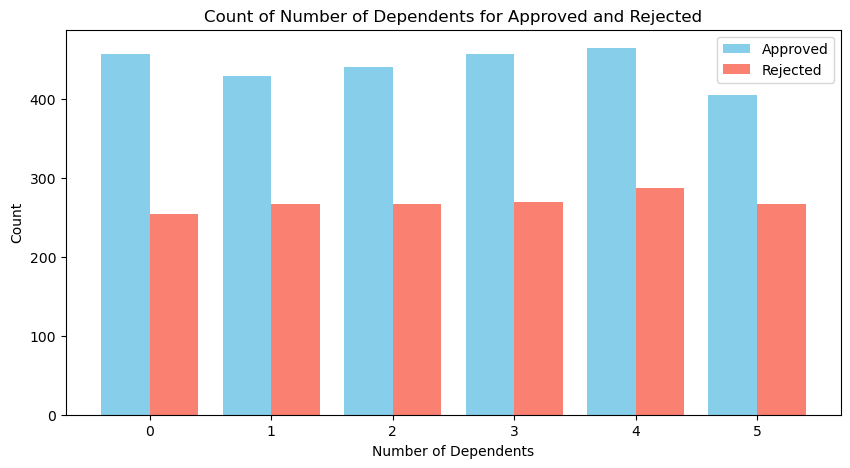

In [18]:
# Membuat plot bar sekaligus
plt.figure(figsize=(10, 5))

plt.bar(dependents_count_approved.index - 0.2, dependents_count_approved, width=0.4, label='Approved', color='skyblue')
plt.bar(dependents_count_rejected.index + 0.2, dependents_count_rejected, width=0.4, label='Rejected', color='salmon')

plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Count of Number of Dependents for Approved and Rejected')
plt.legend()
plt.show()

Berdasarkan chart diatas, tidak terlihat adanya perbedaan yang signifikan sehingga jumlah tanggungan tidak dapat mempengaruhi persetujuan kredit


In [19]:
# Menghitung count of loan term terpisah untuk Approved dan Rejected
loanterm_count_approved = df[df['loan_status'] == ' Approved']['loan_term'].value_counts().sort_index()
loanterm_count_rejected = df[df['loan_status'] == ' Rejected']['loan_term'].value_counts().sort_index()

# Menampilkan hasil
print("Count of Number of loan term for Approved:")
print(loanterm_count_approved)

print("\nCount of Number of loan term for Rejected:")
print(loanterm_count_rejected)

Count of Number of loan term for Approved:
2     315
4     366
6     282
8     220
10    229
12    276
14    239
16    236
18    257
20    236
Name: loan_term, dtype: int64

Count of Number of loan term for Rejected:
2      89
4      81
6     208
8     166
10    207
12    180
14    166
16    176
18    165
20    175
Name: loan_term, dtype: int64


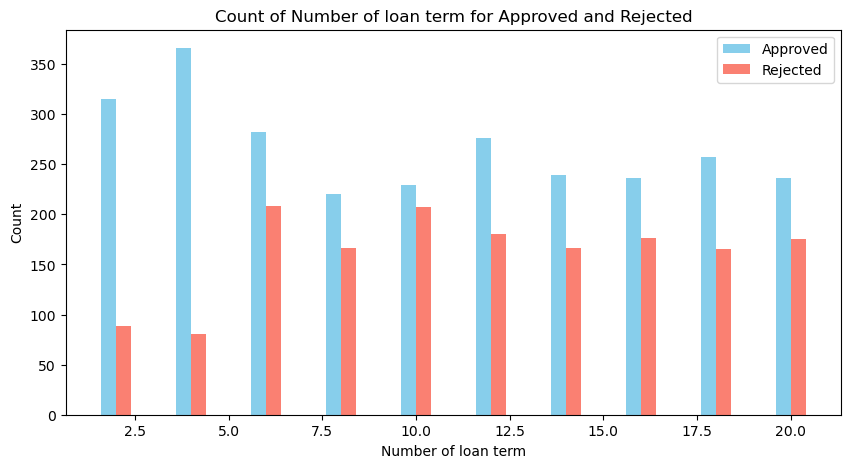

In [20]:
# Membuat plot 
plt.figure(figsize=(10, 5))

plt.bar(loanterm_count_approved.index - 0.2, loanterm_count_approved, width=0.4, label='Approved', color='skyblue')
plt.bar(loanterm_count_rejected.index + 0.2, loanterm_count_rejected, width=0.4, label='Rejected', color='salmon')

plt.xlabel('Number of loan term')
plt.ylabel('Count')
plt.title('Count of Number of loan term for Approved and Rejected')
plt.legend()
plt.show()

Berdasarkan chart diatas, terlihat bahwa untuk pengajuan dengan jangka waktu 2 & 4 bulan memiliki Tingkat persetujuan kredit yang lebih tinggi dibandingkan yang lainnya. Namun secara umum belum dapat disimpulkan bahwa semakin rendah jangka waktu yang diajukan makan persetujuan kredit akan disetujui.


In [21]:
import pandas as pd

# Menentukan batas kategori
bins = [0, 2500000, 5000000, 7500000, float('inf')]  # float('inf') untuk nilai tak terhingga

# Menentukan label kategori
labels = ['0-2.500.000', '2.500.000-5.000.000', '5.000.000-7.500.0000', '> 7.500.000']

# Menambahkan kolom baru dengan kategori yang sesuai
df['income_annum_category'] = pd.cut(df['income_annum'], bins=bins, labels=labels, right=False)

# Tampilkan DataFrame hasil
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,income_annum_category
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,> 7.500.000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,2.500.000-5.000.000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,> 7.500.000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,> 7.500.000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,> 7.500.000
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,2.500.000-5.000.000
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,> 7.500.000
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,5.000.000-7.500.0000
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,0-2.500.000
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,0-2.500.000


In [22]:
income_annum_counts = df['income_annum_category'].value_counts()
print(income_annum_counts)

2.500.000-5.000.000     1100
5.000.000-7.500.0000    1094
> 7.500.000             1092
0-2.500.000              983
Name: income_annum_category, dtype: int64


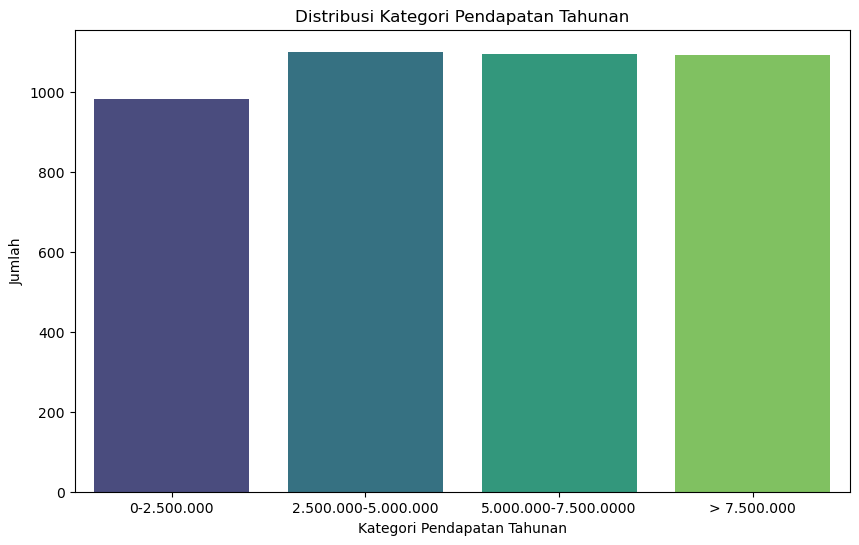

In [23]:
# Membuat plot
plt.figure(figsize=(10, 6))
sns.countplot(x='income_annum_category', data=df, palette='viridis')
plt.title('Distribusi Kategori Pendapatan Tahunan')
plt.xlabel('Kategori Pendapatan Tahunan')
plt.ylabel('Jumlah')
plt.show()

In [24]:
# Membuat filter dan menampilkan hasil
filter_result = df.groupby(['income_annum_category', 'loan_status']).size().unstack(fill_value=0)
print(filter_result)

loan_status             Approved   Rejected
income_annum_category                      
0-2.500.000                  635        348
2.500.000-5.000.000          671        429
5.000.000-7.500.0000         672        422
> 7.500.000                  678        414


In [25]:
# Membuat filter dan menghitung persentase
filter_result = df.groupby(['income_annum_category', 'loan_status']).size().unstack(fill_value=0)
filter_result_percentage = filter_result.div(filter_result.sum(axis=1), axis=0) * 100

# Menampilkan hasil
print(filter_result_percentage)

loan_status             Approved   Rejected
income_annum_category                      
0-2.500.000            64.598169  35.401831
2.500.000-5.000.000    61.000000  39.000000
5.000.000-7.500.0000   61.425960  38.574040
> 7.500.000            62.087912  37.912088


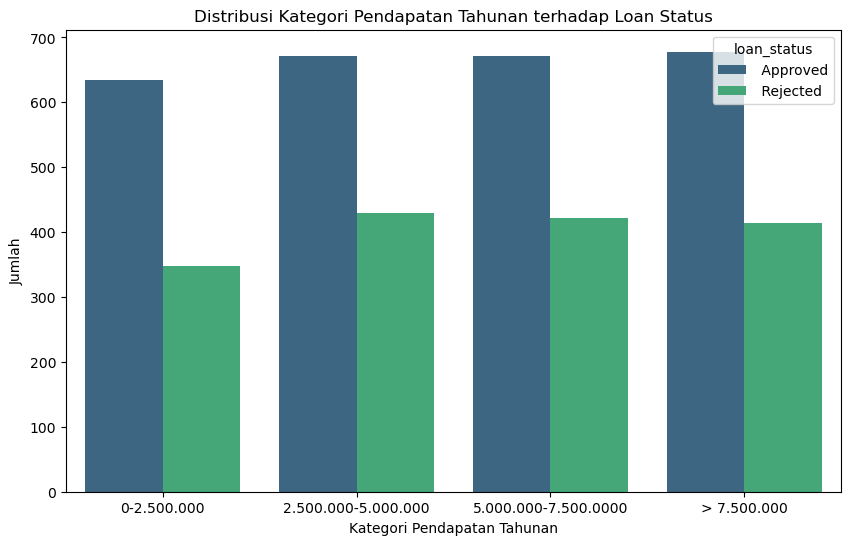

In [26]:
# Membuat plot
plt.figure(figsize=(10, 6))
sns.countplot(x='income_annum_category', hue='loan_status', data=df, palette='viridis')
plt.title('Distribusi Kategori Pendapatan Tahunan terhadap Loan Status')
plt.xlabel('Kategori Pendapatan Tahunan')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan chart diatas, tidak ada perbedaan yang signifikan dari empat kategori pendapatan tahunan terhadap persetujuan kredit.


In [27]:
# Menambahkan kolom baru 'total_assets'
df['total_assets'] = df[['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']].sum(axis=1)

# Menampilkan DataFrame hasil
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,income_annum_category,total_assets
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,> 7.500.000,50700000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,2.500.000-5.000.000,17000000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,> 7.500.000,57700000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,> 7.500.000,52700000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,> 7.500.000,55000000
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,2.500.000-5.000.000,33900000
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,> 7.500.000,70800000
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,5.000.000-7.500.0000,36700000
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,0-2.500.000,5500000
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,0-2.500.000,9500000


In [28]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_assets
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.473928e+06,4.973155e+06,1.512631e+07,4.976692e+06,3.255008e+07
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.502129e+06,4.388966e+06,9.103754e+06,3.250185e+06,1.950533e+07
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00,5.000000e+05
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,1.630000e+07
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,3.150000e+07
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,4.720000e+07
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,9.070000e+07


In [29]:
# Menentukan batas kategori
bins = [0, 25000000, 50000000, 75000000, float('inf')]  # float('inf') untuk nilai tak terhingga

# Menentukan label kategori
labels = ['0-25.000.000', '25.000.000-50.000.000', '50.000.000-75.000.0000', '> 75.000.000']

# Menambahkan kolom baru dengan kategori yang sesuai
df['total_assets_category'] = pd.cut(df['total_assets'], bins=bins, labels=labels, right=False)

# Tampilkan DataFrame hasil
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,income_annum_category,total_assets,total_assets_category
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,> 7.500.000,50700000,50.000.000-75.000.0000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,2.500.000-5.000.000,17000000,0-25.000.000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,> 7.500.000,57700000,50.000.000-75.000.0000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,> 7.500.000,52700000,50.000.000-75.000.0000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,> 7.500.000,55000000,50.000.000-75.000.0000
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,2.500.000-5.000.000,33900000,25.000.000-50.000.000
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,> 7.500.000,70800000,50.000.000-75.000.0000
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,5.000.000-7.500.0000,36700000,25.000.000-50.000.000
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,0-2.500.000,5500000,0-25.000.000
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,0-2.500.000,9500000,0-25.000.000


In [30]:
total_assets_category = df['total_assets_category'].value_counts()
print(total_assets_category)

25.000.000-50.000.000     1687
0-25.000.000              1677
50.000.000-75.000.0000     841
> 75.000.000                64
Name: total_assets_category, dtype: int64


In [31]:
# Membuat filter dan menghitung persentase
filter_result = df.groupby(['total_assets_category', 'loan_status']).size().unstack(fill_value=0)
filter_result_percentage = filter_result.div(filter_result.sum(axis=1), axis=0) * 100

# Menampilkan hasil
print(filter_result_percentage)

loan_status              Approved   Rejected
total_assets_category                       
0-25.000.000            63.208110  36.791890
25.000.000-50.000.000   60.936574  39.063426
50.000.000-75.000.0000  63.139120  36.860880
> 75.000.000            57.812500  42.187500


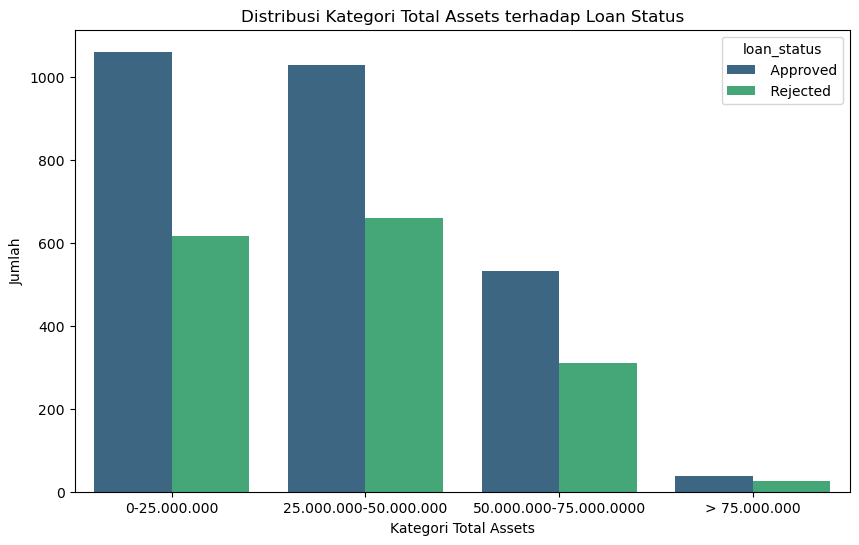

In [32]:
# Membuat plot
plt.figure(figsize=(10, 6))
sns.countplot(x='total_assets_category', hue='loan_status', data=df, palette='viridis')
plt.title('Distribusi Kategori Total Assets terhadap Loan Status')
plt.xlabel('Kategori Total Assets')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan chart diatas, untuk jumlah asset sampai dengan 50.000.000 memiliki jumlah persetujuan kredit yang lebih tinggi dibandingkan dengan jumlah asset diatas 50.000.000

In [33]:
# Membuat filter dan menampilkan hasil dalam bentuk angka
filter_result = df.groupby(['total_assets_category', 'income_annum_category']).size().unstack(fill_value=0)
filter_result

income_annum_category,0-2.500.000,2.500.000-5.000.000,5.000.000-7.500.0000,> 7.500.000
total_assets_category,,,,
0-25.000.000,983,643,50,1
25.000.000-50.000.000,0,457,896,334
50.000.000-75.000.0000,0,0,148,693
> 75.000.000,0,0,0,64


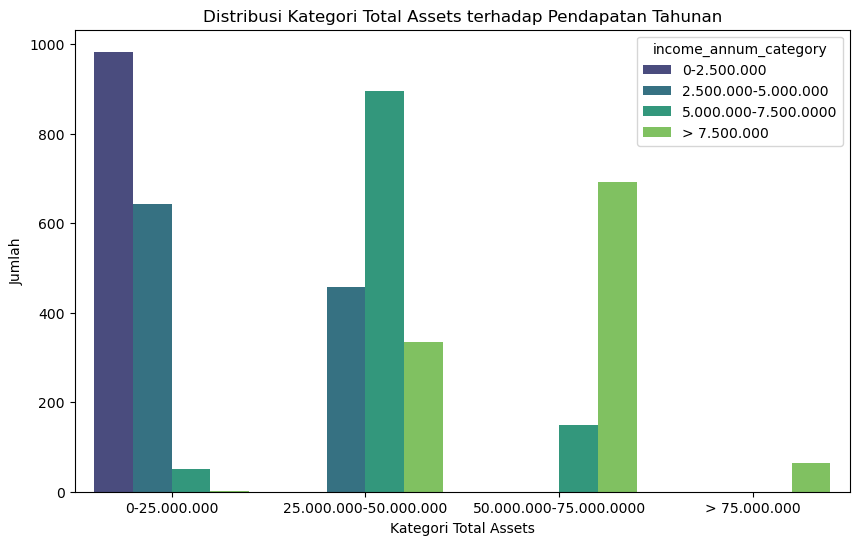

In [34]:
# Membuat plot
plt.figure(figsize=(10, 6))
sns.countplot(x='total_assets_category', hue='income_annum_category', data=df, palette='viridis')
plt.title('Distribusi Kategori Total Assets terhadap Pendapatan Tahunan')
plt.xlabel('Kategori Total Assets')
plt.ylabel('Jumlah')
plt.show()

In [35]:
# Membuat filter dengan tambahan loan_status dan menampilkan hasil dalam bentuk angka
filter_result = df.groupby(['income_annum_category', 'total_assets_category', 'loan_status']).size().unstack(fill_value=0)
filter_result

loan_status                                    Approved   Rejected
income_annum_category total_assets_category                       
0-2.500.000           0-25.000.000                  635        348
                      25.000.000-50.000.000           0          0
                      50.000.000-75.000.0000          0          0
                      > 75.000.000                    0          0
2.500.000-5.000.000   0-25.000.000                  388        255
                      25.000.000-50.000.000         283        174
                      50.000.000-75.000.0000          0          0
                      > 75.000.000                    0          0
5.000.000-7.500.0000  0-25.000.000                   36         14
                      25.000.000-50.000.000         539        357
                      50.000.000-75.000.0000         97         51
                      > 75.000.000                    0          0
> 7.500.000           0-25.000.000                    1          0
                      25.000.000-50.000.000         206        128
                      50.000.000-75.000.0000        434        259
                      > 75.000.000                   37         27

In [36]:
# Menentukan batas kategori
bins = [300, 500 ,700, float('inf')]  # float('inf') untuk nilai tak terhingga

# Menentukan label kategori
labels = ['300-500', '500-700','> 700']

# Menambahkan kolom baru dengan kategori yang sesuai
df['cibil_score_category'] = pd.cut(df['cibil_score'], bins=bins, labels=labels, right=False)

# Tampilkan DataFrame hasil
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,income_annum_category,total_assets,total_assets_category,cibil_score_category
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,> 7.500.000,50700000,50.000.000-75.000.0000,> 700
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,2.500.000-5.000.000,17000000,0-25.000.000,300-500
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,> 7.500.000,57700000,50.000.000-75.000.0000,500-700
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,> 7.500.000,52700000,50.000.000-75.000.0000,300-500
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,> 7.500.000,55000000,50.000.000-75.000.0000,300-500
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,2.500.000-5.000.000,33900000,25.000.000-50.000.000,300-500
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,> 7.500.000,70800000,50.000.000-75.000.0000,500-700
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,5.000.000-7.500.0000,36700000,25.000.000-50.000.000,300-500
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,0-2.500.000,5500000,0-25.000.000,> 700
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,0-2.500.000,9500000,0-25.000.000,300-500


In [37]:
cibil_score_category = df['cibil_score_category'].value_counts()
cibil_score_category

500-700    1439
> 700      1430
300-500    1400
Name: cibil_score_category, dtype: int64

In [38]:
# Membuat filter dan menampilkan hasil
filter_result = df.groupby(['cibil_score_category', 'loan_status']).size().unstack(fill_value=0)
filter_result

loan_status,Approved,Rejected
cibil_score_category,,
300-500,148,1252
500-700,1085,354
> 700,1423,7


In [39]:
# Membuat filter dan menghitung persentase
filter_result = df.groupby(['cibil_score_category', 'loan_status']).size().unstack(fill_value=0)
filter_result_percentage = filter_result.div(filter_result.sum(axis=1), axis=0) * 100

# Menampilkan hasil
filter_result_percentage

loan_status,Approved,Rejected
cibil_score_category,,
300-500,10.571429,89.428571
500-700,75.399583,24.600417
> 700,99.510490,0.489510


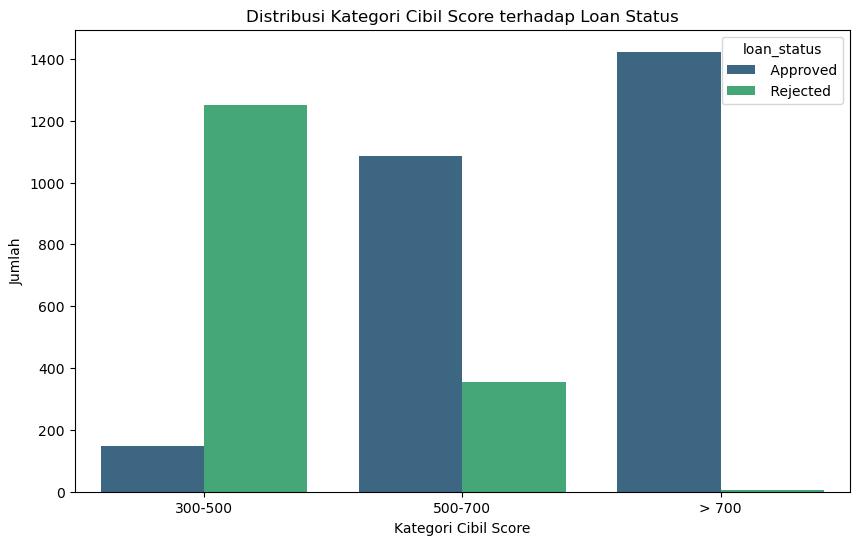

In [40]:
# Membuat plot
plt.figure(figsize=(10, 6))
sns.countplot(x='cibil_score_category', hue='loan_status', data=df, palette='viridis')
plt.title('Distribusi Kategori Cibil Score terhadap Loan Status')
plt.xlabel('Kategori Cibil Score')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan chart diatas, dapat disimpulkan bahwa semakin tinggi Tingkat score kredit maka semakin besar memliki peluang untuk disetujuinya pengajuan kreditnya.

In [41]:
# Drop the specified columns
columns_to_drop = ['income_annum_category', 'total_assets_category', 'cibil_score_category','total_assets']
df = df.drop(columns=columns_to_drop)

## Encode untuk categorical coloums tersebut

In [42]:
df['education'] = df['education'].replace({' Graduate': 1, ' Not Graduate': 0}).astype(int)
df['self_employed'] = df['self_employed'].replace({' Yes': 1, ' No': 0}).astype(int)
df['loan_status'] = df['loan_status'].replace({' Approved': 1, ' Rejected': 0}).astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   int32
 3   self_employed             4269 non-null   int32
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int32
dtypes: int32(3), int64(10)
memory usage: 383.7 KB


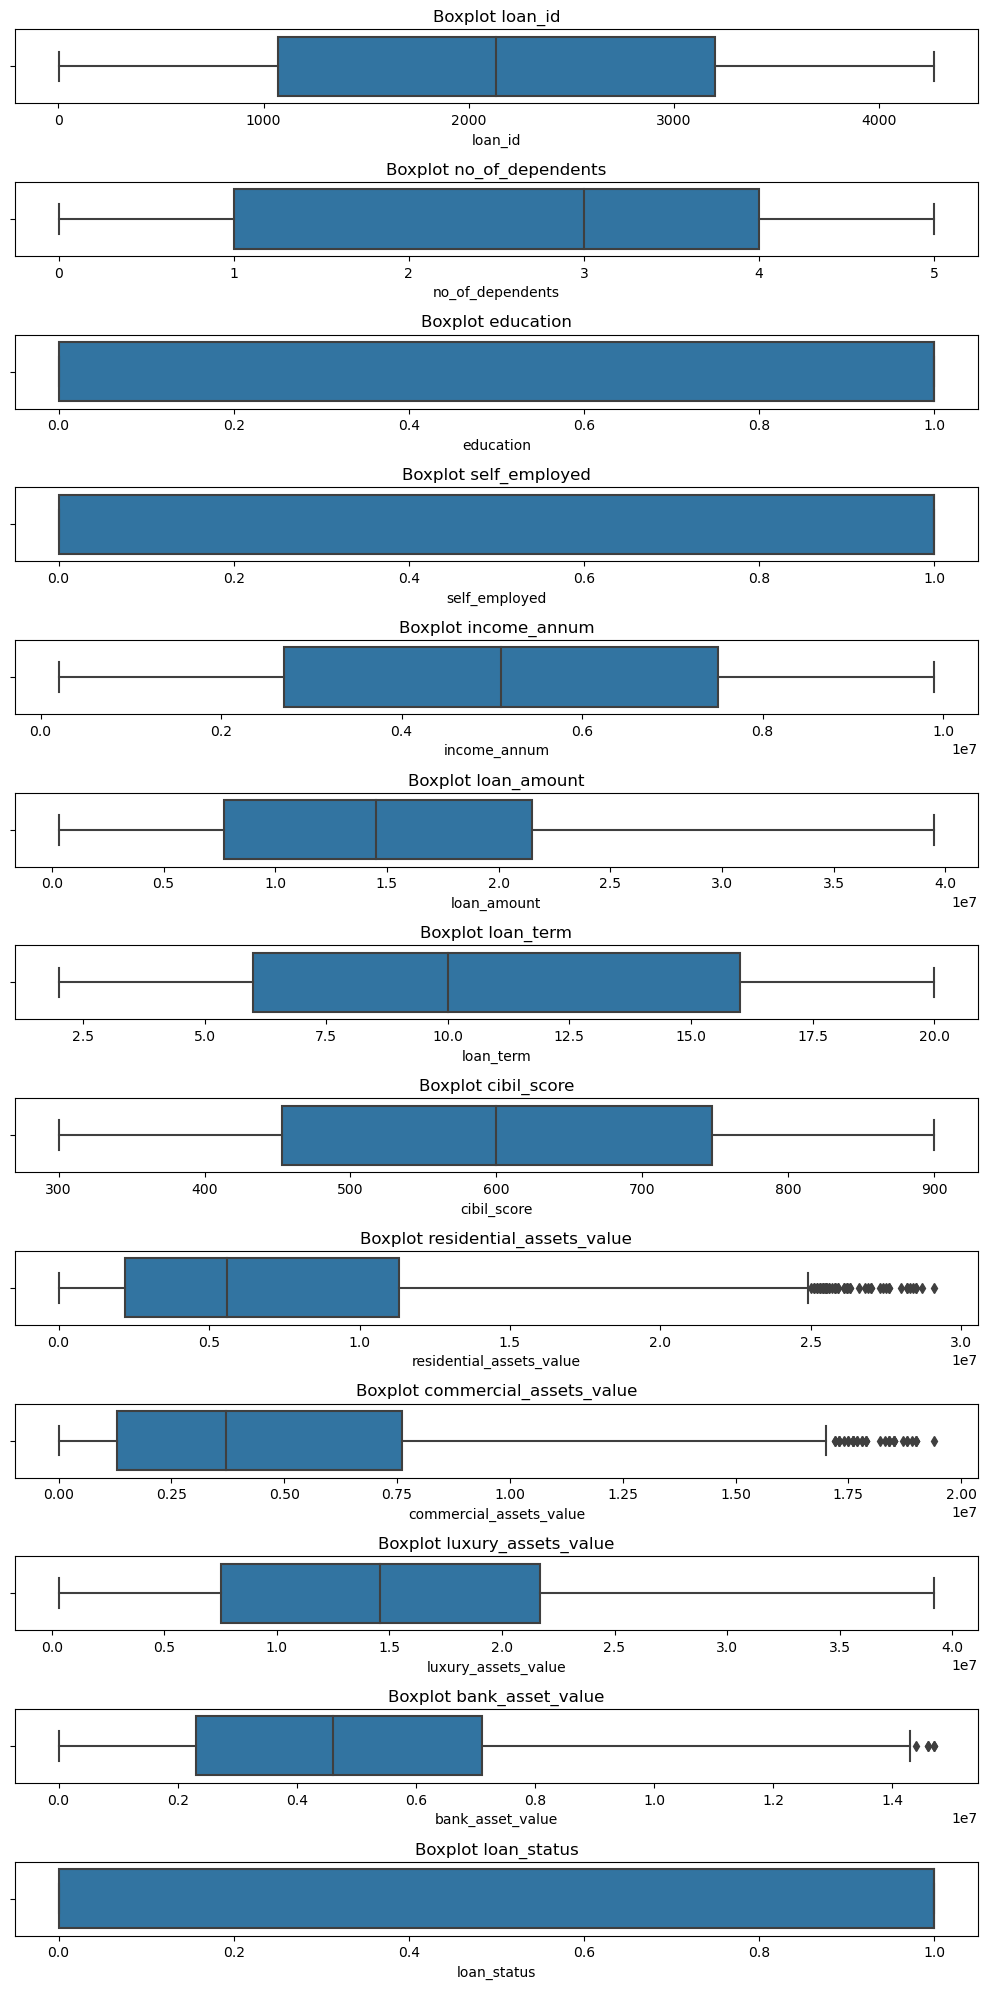

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'int32']).columns

# Membuat subplot berdasarkan jumlah kolom numerik
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 20))

# Melakukan loop untuk setiap kolom numerik dan membuat boxplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot {column}')

plt.tight_layout()
plt.show()

Terdapat outlier namun hal tersebut dirasa wajar sehingga tidak perlu untuk dilakukan handling terhadap outlier tersebut

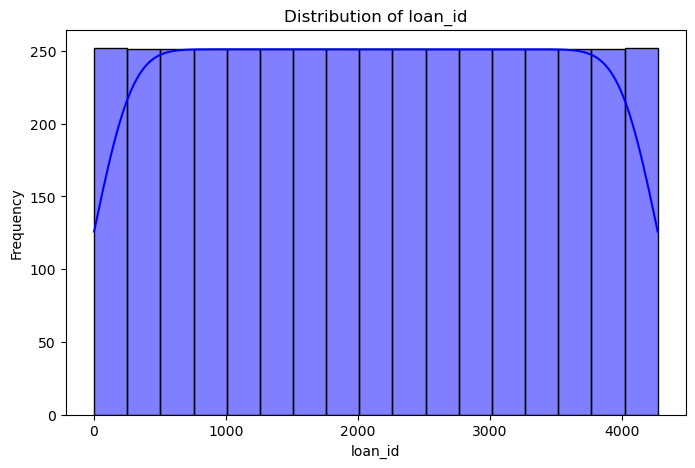

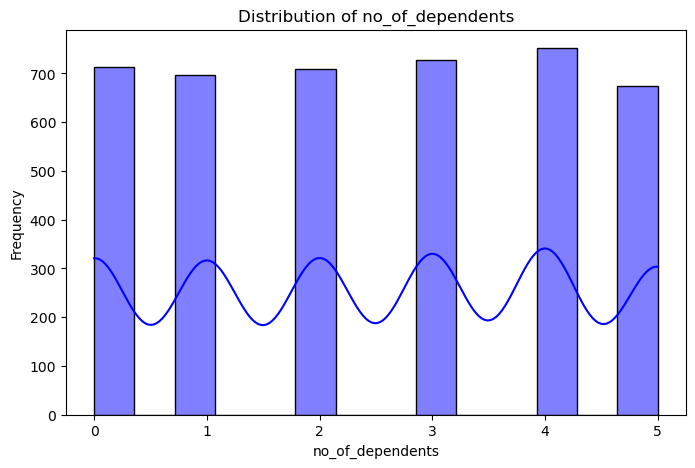

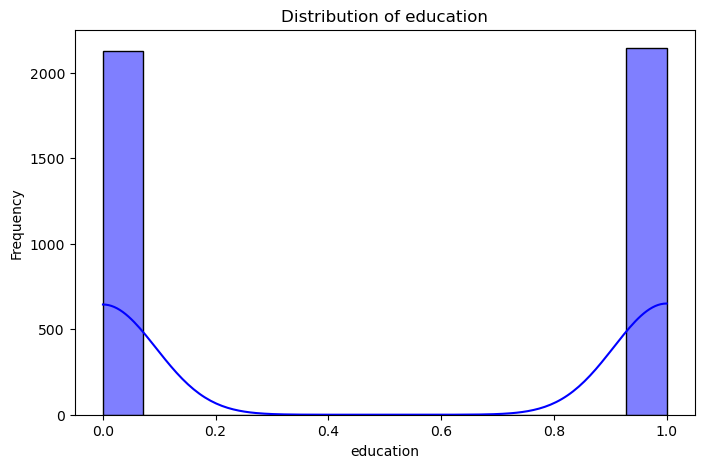

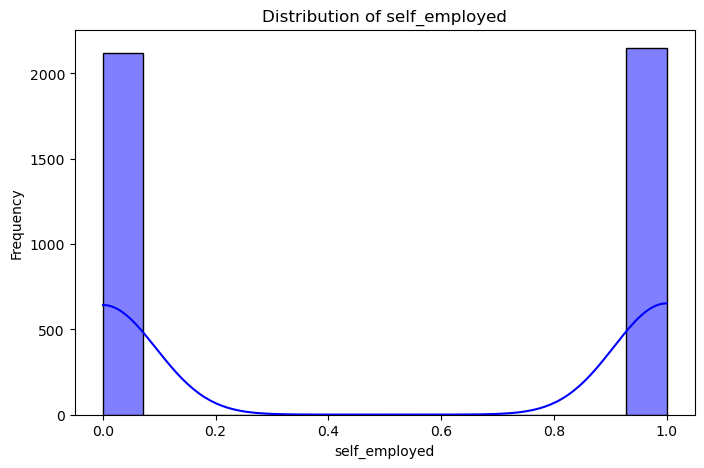

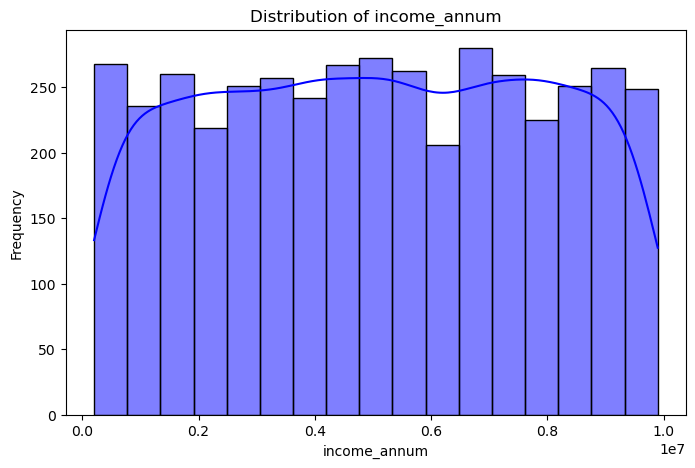

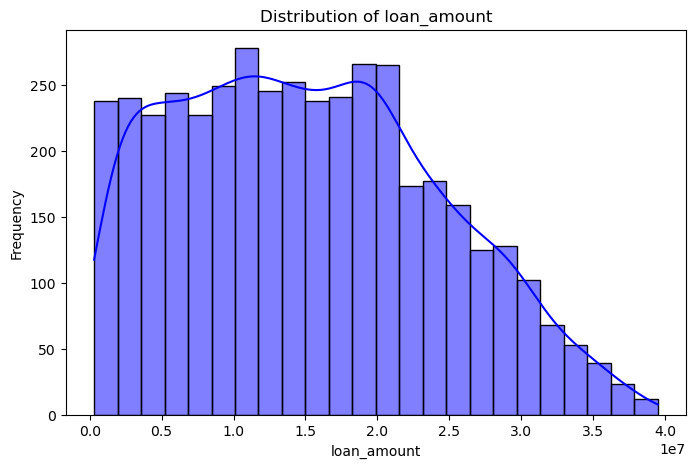

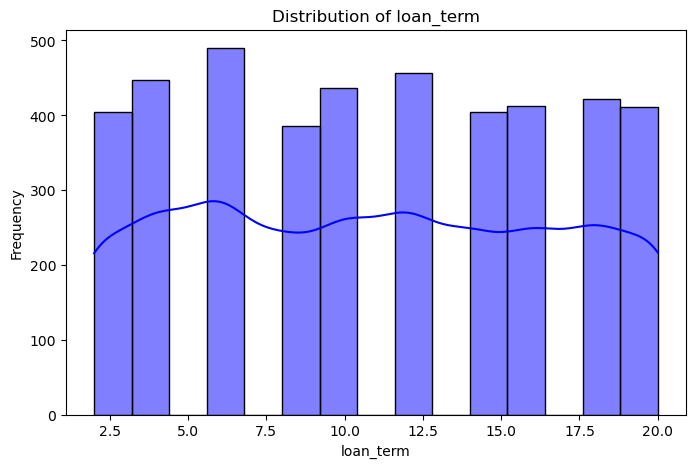

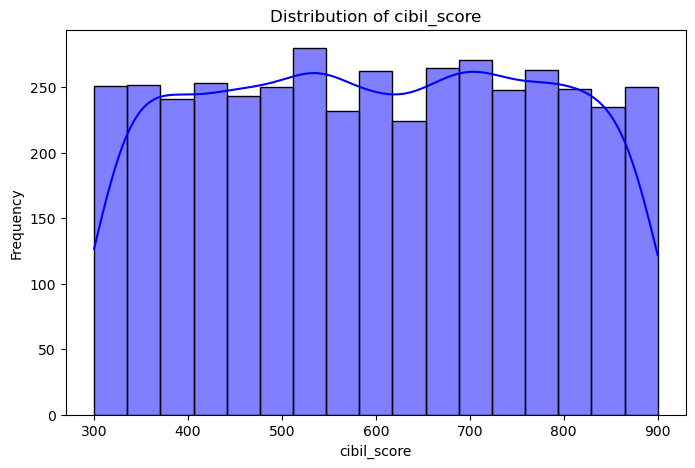

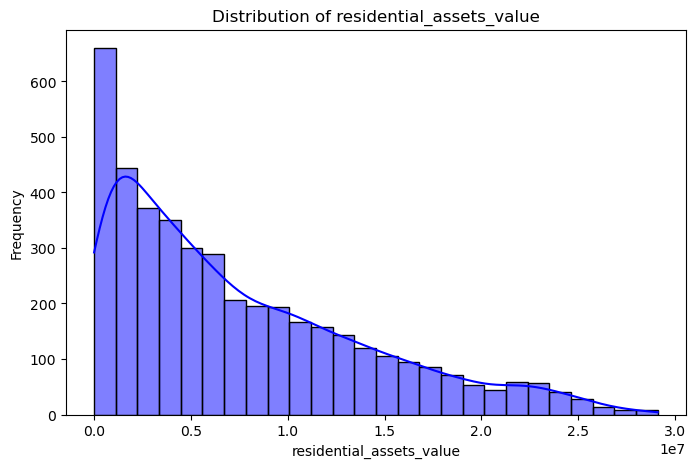

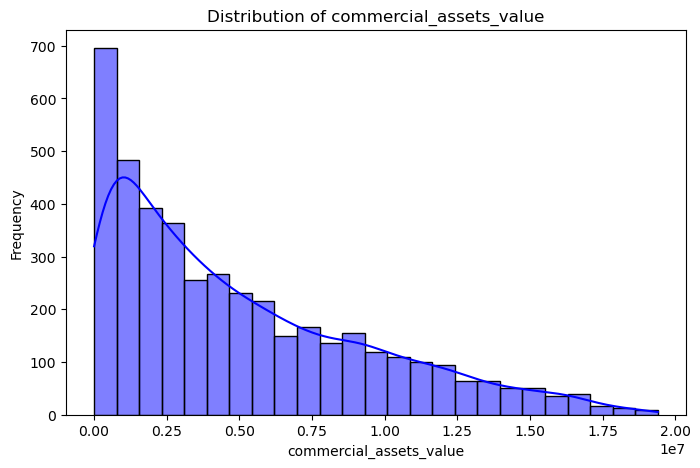

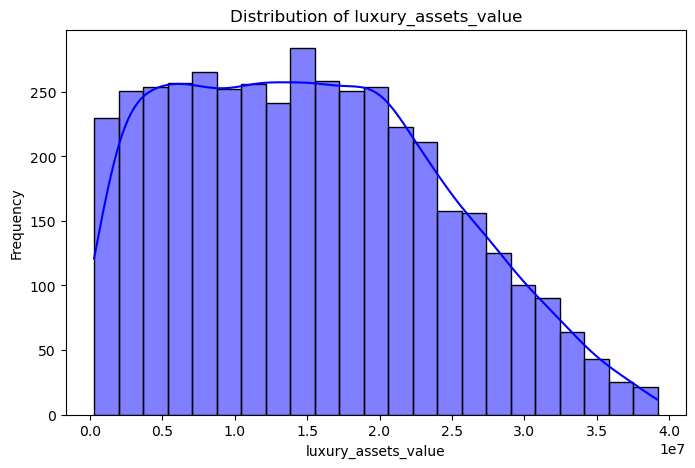

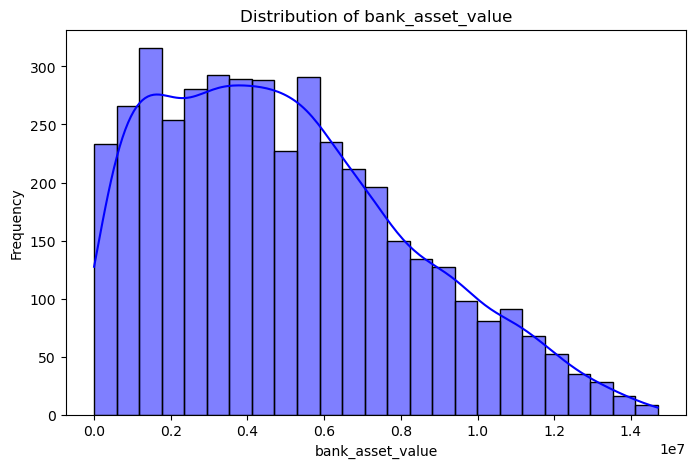

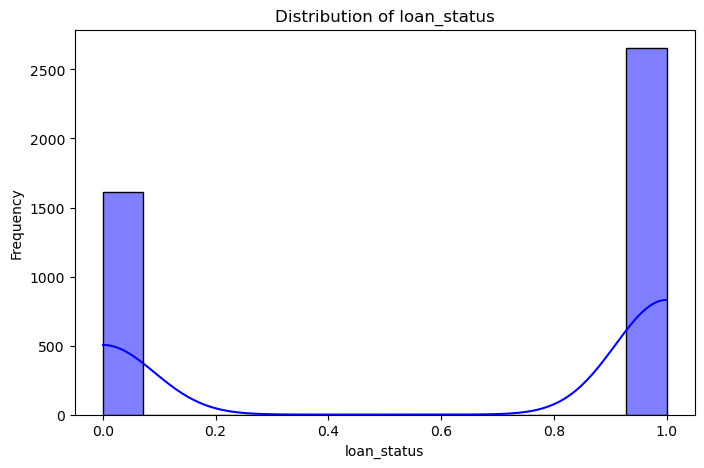

In [45]:
# Selecting only numerical columns for the plot
numerical_columns = df.select_dtypes(include=['int64', 'int32']).columns

# Plotting distribution plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

secara keseleruhan data berdistribusi normal, namun untuk loan amount, residential aset, commercial aset, luxury aset & Bank aset Right-skewed distribution (Positive Skewness).

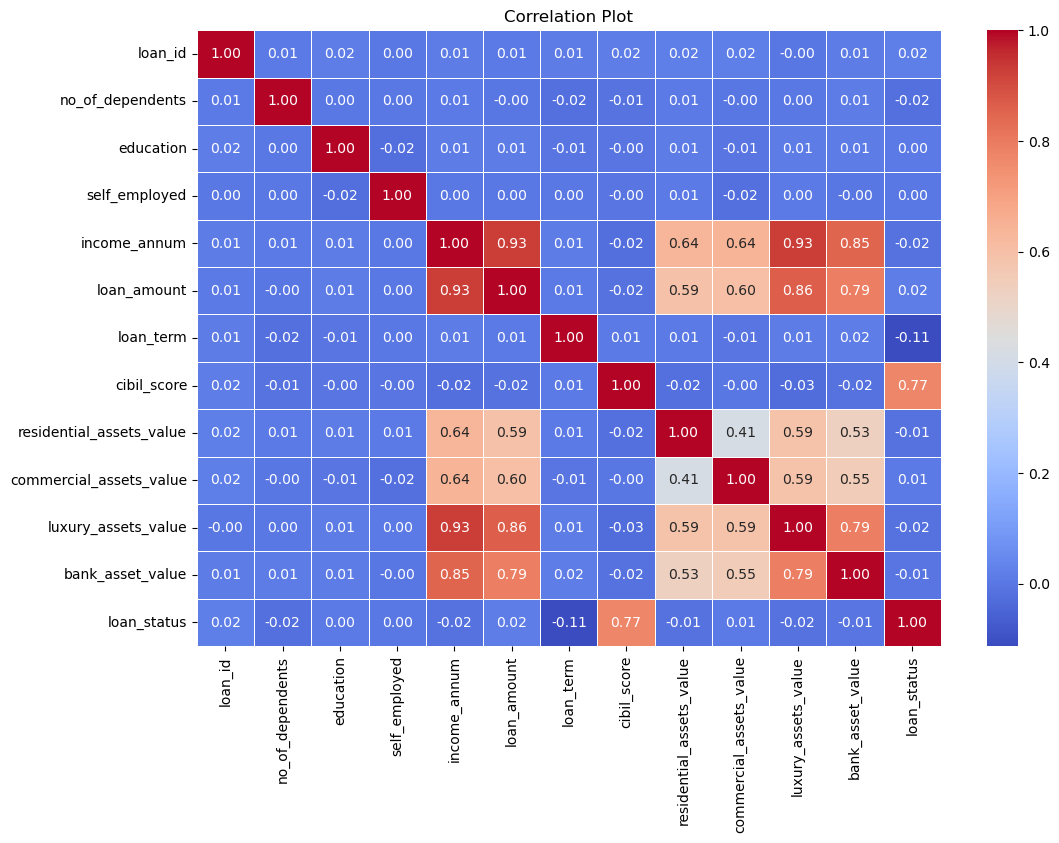

In [46]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Membuat plot korelasi menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

Income annum memiliki pengaruh yang tinggi terhadap loan amount, artinya semakin tinggi pendapatan maka pengajuan kredit yang diajukan akan semakin besar.

Income annum juga memiliki hubungan yang cukup besar terhadap seluruh kategori asset, artinya semakin tinggi pendapatan maka asset yang dimiliki semakin besar.

Cibil score memiliki pengaruh yang cukup besar terhadap loan status.


In [47]:
# Drop 'loan_status' and 'loan_id' columns to create feature matrix X
X = df.drop(['loan_status', 'loan_id'], axis=1)

# Create target variable y containing 'loan_status'
y = df['loan_status']

In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

model_df = {}

def model_val(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.20,
                                                        random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model} accuracy is {accuracy}")
    
    # Recall
    recall = recall_score(y_test, y_pred)
    print(f"{model} recall is {recall}")
    
    # Precision
    precision = precision_score(y_test, y_pred)
    print(f"{model} precision is {precision}")
    
    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print(f"{model} F1 score is {f1}")
    
    # Cross-Validation
    score = cross_val_score(model, X, y, cv=3)
    avg_cross_val_score = np.mean(score)
    print(f"{model} Avg cross val score is {avg_cross_val_score}")
    
    # Save results in model_df
    model_df[model] = {
        'Accuracy': round(accuracy * 100, 2),
        'Recall': round(recall * 100, 2),
        'Precision': round(precision * 100, 2),
        'F1 Score': round(f1 * 100, 2),
        'Avg Cross Val Score': round(avg_cross_val_score * 100, 2)
    }

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.7295081967213115
LogisticRegression() recall is 0.9458955223880597
LogisticRegression() precision is 0.7150916784203103
LogisticRegression() F1 score is 0.8144578313253013
LogisticRegression() Avg cross val score is 0.7278051065823378


C:\Users\landr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\landr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [50]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.6276346604215457
SVC() recall is 1.0
SVC() precision is 0.6276346604215457
SVC() F1 score is 0.7712230215827338
SVC() Avg cross val score is 0.622159756383228


In [51]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.9730679156908665
DecisionTreeClassifier() recall is 0.9757462686567164
DecisionTreeClassifier() precision is 0.9812382739212008
DecisionTreeClassifier() F1 score is 0.9784845650140318
DecisionTreeClassifier() Avg cross val score is 0.9730616069337081


In [52]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.9812646370023419
RandomForestClassifier() recall is 0.9888059701492538
RandomForestClassifier() precision is 0.9814814814814815
RandomForestClassifier() F1 score is 0.9851301115241635
RandomForestClassifier() Avg cross val score is 0.9789177793394237


In [53]:
model_df

{LogisticRegression(): {'Accuracy': 72.95,
  'Recall': 94.59,
  'Precision': 71.51,
  'F1 Score': 81.45,
  'Avg Cross Val Score': 72.78},
 SVC(): {'Accuracy': 62.76,
  'Recall': 100.0,
  'Precision': 62.76,
  'F1 Score': 77.12,
  'Avg Cross Val Score': 62.22},
 DecisionTreeClassifier(): {'Accuracy': 97.31,
  'Recall': 97.57,
  'Precision': 98.12,
  'F1 Score': 97.85,
  'Avg Cross Val Score': 97.31},
 RandomForestClassifier(): {'Accuracy': 98.13,
  'Recall': 98.88,
  'Precision': 98.15,
  'F1 Score': 98.51,
  'Avg Cross Val Score': 97.89}}

Model terbaik adalah Random Forest dikarenakan memeliki nilai tinggi untuk Accuracy, Recall, Precison F1Score & Avg Cross Val diantara model lainnya.

# JOBLIB

In [54]:
rf = RandomForestClassifier()

In [55]:
rf.fit(X,y)

RandomForestClassifier()

In [56]:
import joblib

In [57]:
joblib.dump(rf,'Loan_Approval_Predict')

['Loan_Approval_Predict']

In [58]:
model = joblib.load('Loan_Approval_Predict')

In [59]:
from tkinter import *
import joblib
import pandas as pd

In [60]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    
    model = joblib.load('Loan_Approval_Predict')
    df = pd.DataFrame({
    'no_of_dependents':p1,
    'education':p2,
    'self_employed':p3,
    'income_annum':p4,
    'loan_amount':p5,
    'loan_term':p6,
    'cibil_score':p7,
    'residential_assets_value':p8,
    'commercial_assets_value':p9,
    'luxury_assets_value':p10,
    'bank_asset_value':p11
},index=[0])
    result = model.predict(df)
    
    if result == 1:
        Label(master, text="Loan Approved").grid(row=31)
    else:
        Label(master, text="Loan Rejected").grid(row=31)
        
    
master =Tk()
master.title("Loan Status Prediction Using Machine Learning")
label = Label(master,text = "Loan Approval Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "no_of_dependents [1,2,3,4,5]").grid(row=1)
Label(master,text = "education [1:Gradute,0:Not Graduate]").grid(row=2)
Label(master,text = "self_employed [1:Yes,0:No]").grid(row=3)
Label(master,text = "income_annum").grid(row=4)
Label(master,text = "loan_amount").grid(row=5)
Label(master,text = "loan_term").grid(row=6)
Label(master,text = "cibil_score").grid(row=7)
Label(master,text = "residential_assets_value").grid(row=8)
Label(master,text = "commercial_assets_value").grid(row=9)
Label(master,text = "luxury_assets_value").grid(row=10)
Label(master,text = "bank_asset_value").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()

Setelah dilakukan ujicoba dari sampel hasil yang diperoleh sama dengan data sampel tersebut.